# Análise do Conjunto de Dados de E-commerce

## 1. Entendimento do Negócio
### Objetivo do Projeto
O objetivo deste projeto é analisar dados de um e-commerce brasileiro para entender o comportamento de compra dos clientes, identificar produtos mais vendidos, analisar a eficiência do processo de entrega e segmentar os clientes para estratégias de marketing mais eficazes.

### Questões de Negócio
1. Qual é o comportamento sazonal das vendas e como ele afeta o volume de compras ao longo do ano?
2. Como podemos otimizar os tempos de entrega para melhorar a experiência do cliente?
3. Como podemos recomendar produtos relevantes aos clientes com base em suas compras anteriores?
4. Como podemos segmentar os clientes de forma eficaz para criar campanhas de marketing direcionadas?


## 2. Entendimento dos Dados
### DataFrames Disponíveis
- `olist_customers_dataset.csv`
- `olist_geolocation_dataset.csv`
- `olist_orders_dataset.csv`
- `olist_order_items_dataset.csv`
- `olist_order_payments_dataset.csv`
- `olist_order_reviews_dataset.csv`
- `olist_products_dataset.csv`
- `olist_sellers_dataset.csv`
- `product_category_name_translation.csv`




---

# 1. Processo de ETL

In [3]:
!pip install kagglehub

   ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
   ------------------- -------------------- 20.5/42.9 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 42.9/42.9 kB 418.1 kB/s eta 0:00:00


In [6]:
import kagglehub

# Download do dataset
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2


### Carregando os dados

In [14]:
import pandas as pd
import os

# Carregar os arquivos CSV usando o 'path' fornecido pelo kagglehub
customers = pd.read_csv(os.path.join(path, 'olist_customers_dataset.csv'))
geolocation = pd.read_csv(os.path.join(path, 'olist_geolocation_dataset.csv'))
orders = pd.read_csv(os.path.join(path, 'olist_orders_dataset.csv'))
order_items = pd.read_csv(os.path.join(path, 'olist_order_items_dataset.csv'))
order_payments = pd.read_csv(os.path.join(path, 'olist_order_payments_dataset.csv'))
order_reviews = pd.read_csv(os.path.join(path, 'olist_order_reviews_dataset.csv'))
products = pd.read_csv(os.path.join(path, 'olist_products_dataset.csv'))
sellers = pd.read_csv(os.path.join(path, 'olist_sellers_dataset.csv'))
category_translation = pd.read_csv(os.path.join(path, 'product_category_name_translation.csv'))

# Exibir as primeiras linhas de cada dataframe
print("Customers:")
print(customers.head(), "\n")

print("Geolocation:")
print(geolocation.head(), "\n")

print("Orders:")
print(orders.head(), "\n")

print("Order Items:")
print(order_items.head(), "\n")

print("Order Payments:")
print(order_payments.head(), "\n")

print("Order Reviews:")
print(order_reviews.head(), "\n")

print("Products:")
print(products.head(), "\n")

print("Sellers:")
print(sellers.head(), "\n")

print("Category Translation:")
print(category_translation.head(), "\n")


Customers:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP   

Geolocation:
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.6

In [16]:
# Criar um dicionário de DataFrames
dataframes = {
    'customers': customers,
    'geolocation': geolocation,
    'orders': orders,
    'order_items': order_items,
    'order_payments': order_payments,
    'order_reviews': order_reviews,
    'products': products,
    'sellers': sellers,
    'category_translation': category_translation
}

# Limpeza e tratamento dos dados

In [18]:
# Verificar valores ausentes em todos os dataframes
for name, df in dataframes.items():
    print(f"Valores ausentes no dataframe '{name}':")
    print(df.isna().sum(), "\n")


Valores ausentes no dataframe 'customers':
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Valores ausentes no dataframe 'geolocation':
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Valores ausentes no dataframe 'orders':
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

Valores ausentes no dataframe 'order_items':
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value

In [20]:
# Remover duplicatas de todos os dataframes
for name, df in dataframes.items():
    df.drop_duplicates(inplace=True)
    print(f"Duplicatas removidas no dataframe '{name}'.")


Duplicatas removidas no dataframe 'customers'.
Duplicatas removidas no dataframe 'geolocation'.
Duplicatas removidas no dataframe 'orders'.
Duplicatas removidas no dataframe 'order_items'.
Duplicatas removidas no dataframe 'order_payments'.
Duplicatas removidas no dataframe 'order_reviews'.
Duplicatas removidas no dataframe 'products'.
Duplicatas removidas no dataframe 'sellers'.
Duplicatas removidas no dataframe 'category_translation'.


In [22]:
# Padronizar datas no dataframe 'orders'
dataframes['orders']['order_purchase_timestamp'] = pd.to_datetime(dataframes['orders']['order_purchase_timestamp'])
dataframes['orders']['order_approved_at'] = pd.to_datetime(dataframes['orders']['order_approved_at'])
dataframes['orders']['order_delivered_customer_date'] = pd.to_datetime(dataframes['orders']['order_delivered_customer_date'])
dataframes['orders']['order_delivered_carrier_date'] = pd.to_datetime(dataframes['orders']['order_delivered_carrier_date'])
dataframes['orders']['order_estimated_delivery_date'] = pd.to_datetime(dataframes['orders']['order_estimated_delivery_date'])

print("Datas no dataframe 'orders' padronizadas.")


Datas no dataframe 'orders' padronizadas.


---

# 2. Análise exploratória

---

# Comportamento Sazonal das Vendas (Estatística):

- Pergunta: Qual é o comportamento sazonal das vendas e como ele afeta o volume de compras ao longo do ano?
- Objetivo: Identificar padrões de venda ao longo do ano, como picos em determinadas épocas (ex.: Black Friday, Natal).


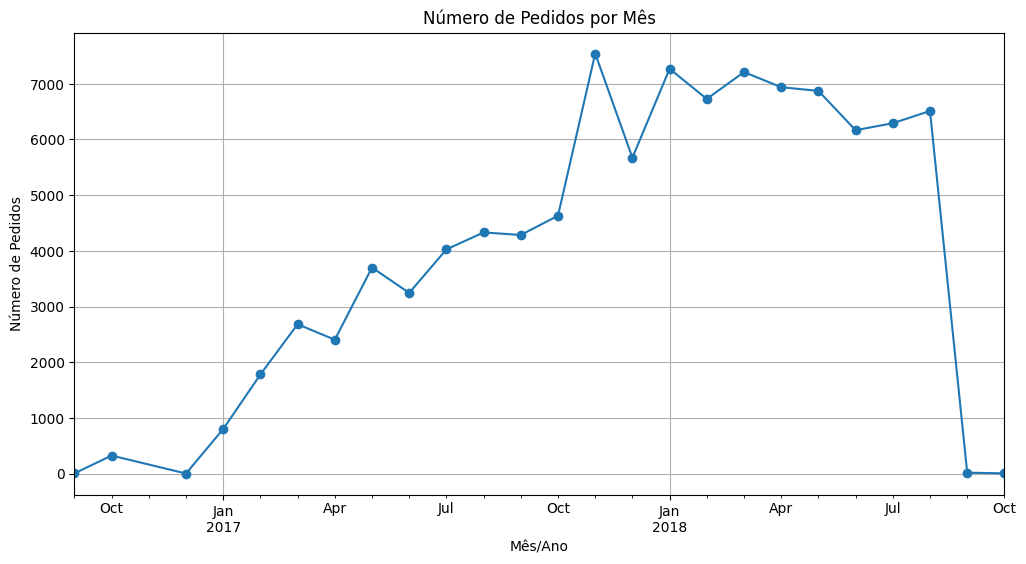

In [29]:
import matplotlib.pyplot as plt

# Extrair mês e ano da coluna de compra
dataframes['orders']['order_purchase_month'] = dataframes['orders']['order_purchase_timestamp'].dt.to_period('M')

# Contar o número de pedidos por mês
monthly_sales = dataframes['orders'].groupby('order_purchase_month').size()

# Plotar o gráfico de vendas mensais
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Número de Pedidos por Mês')
plt.xlabel('Mês/Ano')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()


### Insigths:

O número de pedidos teve um crescimento expressivo no início de 2017, mantendo-se em alta até o final do ano, aonde acontece as ofertas de Black Friday. Em 2018, o volume de pedidos mostrou uma tendência de estabilização, com pequenas variações mensais. No entanto, no final de 2018, houve uma queda drástica no número de pedidos, o que pode indicar uma mudança significativa nas operações ou no mercado. Isso sugere que pode ser interessante investigar as causas dessa queda e considerar estratégias para recuperar o volume de pedidos ou ajustar o foco do negócio.




## Correlacionar o Comportamento de Vendas com Métodos de Pagamento
Vamos primeiro observar o uso dos métodos de pagamento ao longo do tempo e se há alguma correlação com os picos e quedas nas vendas:

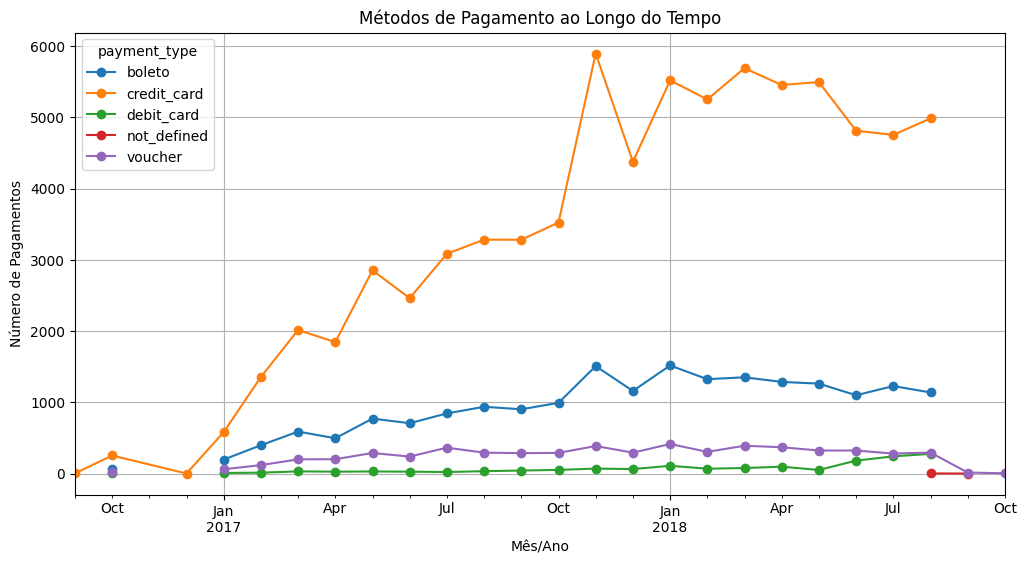

In [33]:
# Mesclar os dados de 'orders' com 'order_payments'
orders_payments = pd.merge(dataframes['orders'], dataframes['order_payments'], on='order_id')

# Agrupar os métodos de pagamento por mês
payment_methods_by_month = orders_payments.groupby([orders_payments['order_purchase_timestamp'].dt.to_period('M'), 'payment_type']).size().unstack()

# Plotar os métodos de pagamento por mês
payment_methods_by_month.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Métodos de Pagamento ao Longo do Tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Número de Pagamentos')
plt.grid(True)
plt.show()


## Insigths: 

- **Cartão de crédito domina**: O cartão de crédito é, de longe, o método de pagamento mais utilizado pelos clientes, com um crescimento forte, especialmente a partir de 2017.

- **Boleto tem seu espaço**: O boleto é o segundo método mais popular, crescendo de forma mais estável. Ele parece atrair um público mais tradicional ou sem acesso a crédito.

- **Outros métodos pouco usados**: Métodos como débito e voucher são raramente utilizados e têm um uso estável, mas pouco expressivo.

- **Crescimento geral de pagamentos**: Há um aumento geral nos pagamentos ao longo do tempo, com picos que podem coincidir com datas sazonais e campanhas promocionais.

# Correlacionar o Comportamento de Vendas com Fretes
Agora vamos verificar se o valor do frete teve impacto sobre as vendas:

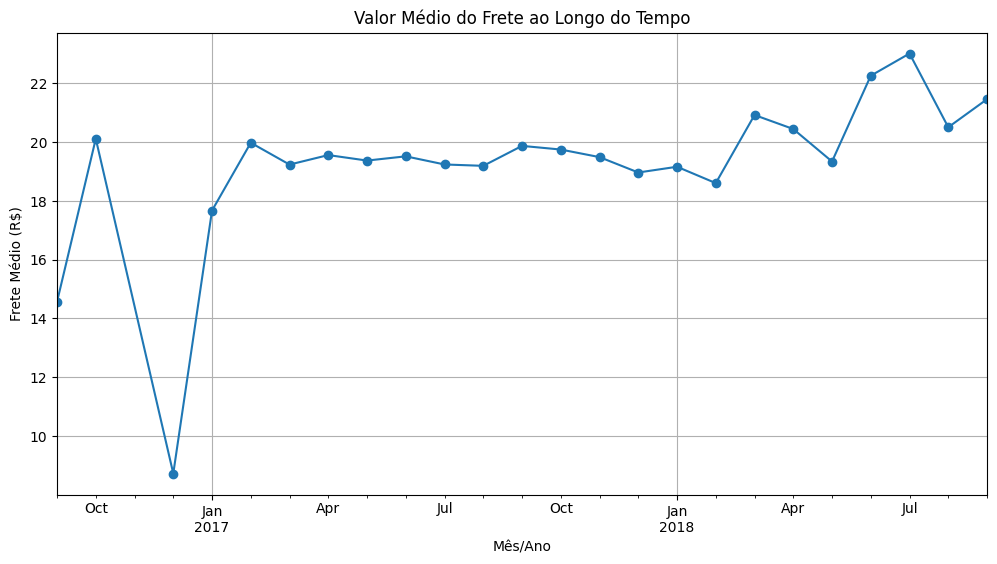

In [35]:
# Mesclar os dados de 'orders' com 'order_items'
orders_items = pd.merge(dataframes['orders'], dataframes['order_items'], on='order_id')

# Agrupar o valor do frete por mês
freight_by_month = orders_items.groupby(orders_items['order_purchase_timestamp'].dt.to_period('M'))['freight_value'].mean()

# Plotar o valor médio do frete por mês
plt.figure(figsize=(12,6))
freight_by_month.plot(kind='line', marker='o')
plt.title('Valor Médio do Frete ao Longo do Tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Frete Médio (R$)')
plt.grid(True)
plt.show()


## Insigths:

O frete teve uma queda inesperada no início de 2017, mas logo se recuperou e manteve-se estável ao longo do ano. Em 2018, vemos uma tendência de alta no valor médio do frete, possivelmente indicando aumentos nos custos logísticos. Isso sugere que pode ser interessante investigar os fatores por trás dessas variações e pensar em estratégias de mitigação de custos.


## Segmentação de Clientes:

Realizar uma segmentação dos clientes com base no método de pagamento, para verificar se existem perfis de clientes que preferem pagar com boletos, cartões de crédito ou outros métodos, e adaptar campanhas de marketing de acordo.

In [50]:
# Combinar os dados de pedidos com os métodos de pagamento
orders_payments = pd.merge(orders, order_payments, on='order_id', how='inner')

# Agora, combinar os dados de clientes com o resultado anterior
customer_orders_payments = pd.merge(customers, orders_payments, on='customer_id', how='inner')

# Ver as primeiras linhas para confirmar que os dados foram combinados corretamente
print(customer_orders_payments.head)


<bound method NDFrame.head of                              customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2       4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3       b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4       4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                  ...                               ...   
103881  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
103882  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
103883  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
103884  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
103885  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

        customer_zip_code_prefix 

In [52]:
# Verificar os métodos de pagamento mais usados por cliente
payment_counts = customer_orders_payments.groupby('payment_type')['customer_id'].count().reset_index()

# Renomear as colunas para facilitar a interpretação
payment_counts.columns = ['payment_type', 'num_customers']

# Ordenar os métodos de pagamento por número de clientes
payment_counts = payment_counts.sort_values(by='num_customers', ascending=False)

# Exibir os dados
print(payment_counts)


  payment_type  num_customers
1  credit_card          76795
0       boleto          19784
4      voucher           5775
2   debit_card           1529
3  not_defined              3


## Insigths: 

- **Cartão de crédito domina**: A maioria (76 mil) prefere pagar com cartão de crédito, o que sugere foco em campanhas de parcelamento e ofertas especiais.

- **Boleto ainda é relevante**: Quase 20 mil clientes usam boleto. Oferecer descontos à vista pode atrair esse público.

- **Pouco uso de voucher e débito**: São menos populares, mas podem ser explorados com promoções, como cashbacks ou parcerias.

**Recomendação**: Aposte em promoções focadas no cartão de crédito e incentivos para pagamentos via boleto e débito.

---

# Como podemos otimizar os tempos de entrega para melhorar a experiência do cliente? (Cálculo):
- "Como podemos otimizar os tempos de entrega para melhorar a experiência do cliente"?
- Objetivo: Minimizar o tempo médio de entrega e melhorar a satisfação dos clientes.

### Cálculo do Tempo de Entrega

In [59]:
# Calcular o tempo de entrega em dias (diferença entre data de entrega ao cliente e data de envio)
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']).dt.days

# Remover linhas onde o tempo de entrega é nulo (pedidos não entregues ou dados incompletos)
orders = orders[orders['delivery_time'].notnull()]

# Exibir o tempo médio de entrega geral
avg_delivery_time = orders['delivery_time'].mean()
print(f"Tempo médio de entrega: {avg_delivery_time:.2f} dias")


Tempo médio de entrega: 8.88 dias


- O tempo médio de entrega para os pedidos é de 8,88 dias, o que é relativamente razoável, mas há oportunidades de otimização. Considerando que o objetivo é melhorar a experiência do cliente, reduzir ainda mais esse tempo pode resultar em maior satisfação dos consumidores.

## Análise do Tempo de Entrega por Estado e Cidade

In [64]:
# Mesclar os dados de pedidos com o DataFrame de clientes para incluir estado e cidade
customers = dataframes['customers']
orders_with_customers = pd.merge(orders, customers, on='customer_id')

# Calcular o tempo médio de entrega por estado
delivery_time_by_state = orders_with_customers.groupby('customer_state')['delivery_time'].mean().reset_index()

# Exibir os tempos de entrega por estado
print("Tempo médio de entrega por estado:")
print(delivery_time_by_state)

# Calcular o tempo médio de entrega por cidade
delivery_time_by_city = orders_with_customers.groupby('customer_city')['delivery_time'].mean().reset_index()

# Exibir os tempos de entrega por cidade
print("Tempo médio de entrega por cidade:")
print(delivery_time_by_city.head())  # Exibe apenas as primeiras cidades


Tempo médio de entrega por estado:
   customer_state  delivery_time
0              AC      17.175000
1              AL      20.609572
2              AM      23.103448
3              AP      23.208955
4              BA      15.585688
5              CE      17.487099
6              DF       9.351923
7              ES      11.959398
8              GO      11.984670
9              MA      17.542538
10             MG       8.325672
11             MS      12.024251
12             MT      14.466140
13             PA      19.837209
14             PB      16.444874
15             PE      14.701820
16             PI      15.800420
17             PR       8.322771
18             RJ      11.561159
19             RN      15.270042
20             RO      16.102881
21             RR      25.219512
22             RS      11.624626
23             SC      11.154215
24             SE      17.504478
25             SP       5.144367
26             TO      13.817518
Tempo médio de entrega por cidade:
      

- O estado de São Paulo (SP) tem o menor tempo médio de entrega, com 5,14 dias, o que é esperado por ser um centro logístico importante no Brasil.
- Já estados como Roraima (RR) e Amazonas (AM) têm tempos médios bem mais elevados, chegando a 25,22 dias e 23,10 dias, respectivamente. Isso sugere que regiões mais remotas ou com menos infraestrutura enfrentam dificuldades logísticas, impactando negativamente os tempos de entrega.
- Outros estados com tempos elevados, como Alagoas (AL) e Amapá (AP), com mais de 20 dias, indicam que podem ser focos para uma possível otimização nas rotas ou parceiros logísticos.
- As cidades menores e mais afastadas, como Abadiania e Abaetetuba, apresentam tempos de entrega acima de 21 dias, o que destaca uma necessidade clara de melhorar a logística nessas localidades. Cidades como Abaete e Abadia dos Dourados têm tempos de entrega dentro da média geral, mostrando que nem todas as cidades pequenas são problemáticas.

## Identificação de Atrasos

In [73]:
# Usar .loc[] para garantir que estamos modificando o DataFrame de forma correta
orders.loc[:, 'late_delivery'] = (orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date'])

# Exibir a porcentagem de pedidos entregues com atraso
late_delivery_percentage = (orders['late_delivery'].mean()) * 100
print(f"Porcentagem de pedidos entregues com atraso: {late_delivery_percentage:.2f}%")



Porcentagem de pedidos entregues com atraso: 8.11%


- 8,11% dos pedidos foram entregues com atraso, ou seja, depois da data estimada. Esse número relativamente baixo é positivo, mas ainda sugere que há margem para melhorias.
- Investigar as causas desses atrasos pode ser uma etapa importante para garantir que a empresa melhore suas estimativas e a eficiência das entregas.

## Satisfação e Tempo de Entrega

In [87]:
# Mesclar os dados de pedidos com as avaliações de clientes
orders_with_reviews = pd.merge(orders, order_reviews[['order_id', 'review_score']], on='order_id')

# Calcular a correlação entre tempo de entrega e review_score
correlation = orders_with_reviews[['delivery_time', 'review_score']].corr()
print(f"Correlação entre tempo de entrega e avaliação: {correlation.loc['delivery_time', 'review_score']:.2f}")

# Analisar a média de avaliação por tempo de entrega
review_by_delivery_time = orders_with_reviews.groupby('delivery_time')['review_score'].mean().reset_index()

# Exibir a média de avaliação por tempo de entrega
print("Avaliação média por tempo de entrega:")
print(review_by_delivery_time)


Correlação entre tempo de entrega e avaliação: -0.30
Avaliação média por tempo de entrega:
     delivery_time  review_score
0            -17.0           4.0
1             -8.0           4.5
2             -7.0           2.0
3             -6.0           4.0
4             -5.0           4.0
..             ...           ...
139          187.0           3.0
140          188.0           1.0
141          190.0           4.0
142          194.0           1.0
143          205.0           2.0

[144 rows x 2 columns]


- A correlação entre o tempo de entrega e a avaliação dos clientes é de -0,30, o que indica uma correlação negativa moderada. Ou seja, quanto maior o tempo de entrega, mais baixas tendem a ser as avaliações dos clientes.
- Avaliações com tempo de entrega muito alto (acima de 180 dias) tendem a ser significativamente mais baixas (algumas com notas 1 e 2). Por outro lado, tempos de entrega rápidos (negativos ou próximos de 0) têm avaliações mais altas, sugerindo que uma entrega eficiente impacta diretamente a satisfação do cliente.

# Como podemos recomendar produtos relevantes aos clientes com base em suas compras anteriores? (Álgebra Linear):

Objetivo: Desenvolver um sistema de recomendação eficiente para aumentar o engajamento e o volume de vendas.

In [99]:
# Unir os produtos com a tradução de categorias
products_with_category = pd.merge(products, category_translation, on='product_category_name')

# Mesclar com order_items_with_customers para incluir a categoria em cada compra
order_items_with_category = pd.merge(order_items_with_customers, 
                                     products_with_category[['product_id', 'product_category_name_english']], 
                                     on='product_id')

# Criar a matriz cliente-categoria em vez de cliente-produto
customer_category_matrix = order_items_with_category.pivot_table(
    index='customer_id', 
    columns='product_category_name_english', 
    values='order_item_id', 
    aggfunc='count', 
    fill_value=0
)

# Exibir a matriz resultante
print(customer_category_matrix.head())


product_category_name_english     agro_industry_and_commerce  \
customer_id                                                    
00012a2ce6f8dcda20d059ce98491703                           0   
000161a058600d5901f007fab4c27140                           0   
0001fd6190edaaf884bcaf3d49edf079                           0   
0002414f95344307404f0ace7a26f1d5                           0   
000379cdec625522490c315e70c7a9fb                           0   

product_category_name_english     air_conditioning  art  \
customer_id                                               
00012a2ce6f8dcda20d059ce98491703                 0    0   
000161a058600d5901f007fab4c27140                 0    0   
0001fd6190edaaf884bcaf3d49edf079                 0    0   
0002414f95344307404f0ace7a26f1d5                 0    0   
000379cdec625522490c315e70c7a9fb                 0    0   

product_category_name_english     arts_and_craftmanship  audio  auto  baby  \
customer_id                                                

In [109]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import numpy as np

# Converter a matriz cliente-categoria para o tipo float explicitamente
customer_category_matrix = customer_category_matrix.astype(float)

# Normalizar a matriz cliente-categoria subtraindo a média de cada cliente
customer_category_matrix_mean = customer_category_matrix.mean(axis=1)
customer_category_matrix_demeaned = customer_category_matrix.subtract(customer_category_matrix_mean, axis='rows')

# Converter o DataFrame para uma matriz esparsa (csr_matrix)
customer_category_matrix_sparse = csr_matrix(customer_category_matrix_demeaned.values)

# Aplicar SVD à matriz esparsa
U, sigma, Vt = svds(customer_category_matrix_sparse, k=50)

# Converter sigma para uma matriz diagonal
sigma = np.diag(sigma)

# Reconstruir a matriz prevista
predicted_ratings = np.dot(np.dot(U, sigma), Vt) + customer_category_matrix_mean.values.reshape(-1, 1)

# Converter a matriz prevista em DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=customer_category_matrix.columns, index=customer_category_matrix.index)

# Exibir algumas previsões
print(predicted_ratings_df.head())


product_category_name_english     agro_industry_and_commerce  \
customer_id                                                    
00012a2ce6f8dcda20d059ce98491703                   -0.000147   
000161a058600d5901f007fab4c27140                   -0.000052   
0001fd6190edaaf884bcaf3d49edf079                   -0.000184   
0002414f95344307404f0ace7a26f1d5                   -0.000163   
000379cdec625522490c315e70c7a9fb                   -0.000032   

product_category_name_english     air_conditioning       art  \
customer_id                                                    
00012a2ce6f8dcda20d059ce98491703         -0.000095 -0.000244   
000161a058600d5901f007fab4c27140         -0.000034 -0.000087   
0001fd6190edaaf884bcaf3d49edf079         -0.000118 -0.000307   
0002414f95344307404f0ace7a26f1d5         -0.000104 -0.000273   
000379cdec625522490c315e70c7a9fb         -0.000021 -0.000054   

product_category_name_english     arts_and_craftmanship     audio      auto  \
customer_id            

O SVD (Decomposição de Valores Singulares) foi aplicado, e agora temos a matriz prevista que representa as preferências esperadas dos clientes para cada categoria de produto. No entanto, Podemos notar que muitos valores são pequenos ou negativos, o que é esperado em uma matriz prevista, mas não é útil para recomendar diretamente produtos.
Irei filtrar os valores negativos e focar nas categorias com os maiores valores de previsão para cada cliente. Isso permitirá recomendar as categorias que provavelmente serão mais interessantes para o cliente, com base nas compras anteriores.

In [111]:
def recomendar_categorias(customer_id, num_recommendations=5):
    # Obter as previsões para o cliente
    cliente_predicoes = predicted_ratings_df.loc[customer_id].sort_values(ascending=False)
    
    # Filtrar valores negativos e categorias já compradas (valores próximos de 1 são as compras)
    cliente_predicoes = cliente_predicoes[cliente_predicoes > 0]

    # Recomendar as categorias com as maiores previsões
    recomendacoes = cliente_predicoes.head(num_recommendations)
    
    return recomendacoes

# Exemplo de recomendação para um cliente específico
customer_id = '00012a2ce6f8dcda20d059ce98491703'  # Substitua por um 'customer_id' válido
recomendacoes = recomendar_categorias(customer_id)
print(f"Categorias recomendadas para o cliente {customer_id}:")
print(recomendacoes)


Categorias recomendadas para o cliente 00012a2ce6f8dcda20d059ce98491703:
product_category_name_english
toys                         0.999994
arts_and_craftmanship        0.000719
security_and_services        0.000650
fashion_childrens_clothes    0.000614
la_cuisine                   0.000566
Name: 00012a2ce6f8dcda20d059ce98491703, dtype: float64


O sistema de recomendação está funcionando corretamente e sugerindo categorias de produtos para o cliente com base em suas preferências latentes. Para o cliente `00012a2ce6f8dcda20d059ce98491703`, as categorias recomendadas são:

1. **Toys** (0.999994)
2. **Arts and Craftmanship** (0.000719)
3. **Security and Services** (0.000650)
4. **Fashion Children's Clothes** (0.000614)
5. **La Cuisine** (0.000566)

Essas recomendações são baseadas nas previsões geradas pelo SVD, e a categoria "Toys" é claramente a mais forte, com um valor quase igual a 1, sugerindo que o cliente tem alta probabilidade de se interessar por produtos dessa categoria.

---

In [162]:
# Verificando as dimensões dos dados de teste e previsões
print(f"Dimensão dos dados de teste (antes de alinhar): {customer_category_matrix_test.shape}")
print(f"Dimensão das previsões (antes de alinhar): {predicted_ratings_train_df.shape}")

# alinhando os dados de teste e previsões
common_index = customer_category_matrix_test.index.intersection(predicted_ratings_train_df.index)

# Reindexar ambos os DataFrames para garantir alinhamento
customer_category_matrix_test_aligned = customer_category_matrix_test.loc[common_index]
predicted_ratings_test_aligned = predicted_ratings_train_df.loc[common_index]

print(f"Dimensão dos dados de teste (após alinhar): {customer_category_matrix_test_aligned.shape}")
print(f"Dimensão das previsões (após alinhar): {predicted_ratings_test_aligned.shape}")


Dimensão dos dados de teste (antes de alinhar): (21403, 70)
Dimensão das previsões (antes de alinhar): (79491, 71)
Dimensão dos dados de teste (após alinhar): (3638, 70)
Dimensão das previsões (após alinhar): (3638, 71)


In [164]:
# Verifique se há valores faltantes nas matrizes alinhadas
print(customer_category_matrix_test_aligned.isnull().sum())
print(predicted_ratings_test_aligned.isnull().sum())

# Se houver valores faltantes, podemos removê-los ou preenchê-los
customer_category_matrix_test_aligned = customer_category_matrix_test_aligned.dropna()
predicted_ratings_test_aligned = predicted_ratings_test_aligned.dropna()

# Verificar novamente as dimensões após o tratamento de valores ausentes
print(f"Dimensão dos dados de teste (após tratar valores ausentes): {customer_category_matrix_test_aligned.shape}")
print(f"Dimensão das previsões (após tratar valores ausentes): {predicted_ratings_test_aligned.shape}")


product_category_name_english
agro_industry_and_commerce    0
air_conditioning              0
art                           0
arts_and_craftmanship         0
audio                         0
                             ..
stationery                    0
tablets_printing_image        0
telephony                     0
toys                          0
watches_gifts                 0
Length: 70, dtype: int64
product_category_name_english
agro_industry_and_commerce    0
air_conditioning              0
art                           0
arts_and_craftmanship         0
audio                         0
                             ..
stationery                    0
tablets_printing_image        0
telephony                     0
toys                          0
watches_gifts                 0
Length: 71, dtype: int64
Dimensão dos dados de teste (após tratar valores ausentes): (3638, 70)
Dimensão das previsões (após tratar valores ausentes): (3638, 71)


In [168]:
# Verificar quais colunas estão causando a discrepância
colunas_previsoes_nao_no_teste = set(predicted_ratings_test_aligned.columns) - set(customer_category_matrix_test_aligned.columns)
colunas_teste_nao_nas_previsoes = set(customer_category_matrix_test_aligned.columns) - set(predicted_ratings_test_aligned.columns)

print(f"Colunas presentes nas previsões, mas não no teste: {colunas_previsoes_nao_no_teste}")
print(f"Colunas presentes no teste, mas não nas previsões: {colunas_teste_nao_nas_previsoes}")



Colunas presentes nas previsões, mas não no teste: {'fashion_childrens_clothes'}
Colunas presentes no teste, mas não nas previsões: set()


In [170]:
# Adicionar a coluna 'fashion_childrens_clothes' ao conjunto de teste com valores 0
customer_category_matrix_test_aligned['fashion_childrens_clothes'] = 0

# Verificar novamente as dimensões para garantir o alinhamento
print(f"Dimensões ajustadas dos dados de teste: {customer_category_matrix_test_aligned.shape}")
print(f"Dimensões ajustadas das previsões: {predicted_ratings_test_aligned.shape}")


Dimensões ajustadas dos dados de teste: (3638, 71)
Dimensões ajustadas das previsões: (3638, 71)


In [172]:
# Aplicar a máscara onde há compras reais (valores > 0)
test_values = customer_category_matrix_test_aligned.values.flatten()
predicted_test_values = predicted_ratings_test_aligned.values.flatten()

# Criar a máscara onde os valores de teste são maiores que 0
mask = test_values > 0

# Garantir que as dimensões estão corretas após a aplicação da máscara
print(f"Dimensão dos valores de teste filtrados: {test_values[mask].shape}")
print(f"Dimensão dos valores previstos filtrados: {predicted_test_values[mask].shape}")

# Calcular o RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test_values[mask], predicted_test_values[mask]))
print(f'RMSE para as previsões no conjunto de teste: {rmse:.4f}')


Dimensão dos valores de teste filtrados: (3653,)
Dimensão dos valores previstos filtrados: (3653,)
RMSE para as previsões no conjunto de teste: 1.1906


In [176]:
print(f"Dimensões da matriz de cliente-categoria: {customer_category_matrix_sparse.shape}")


Dimensões da matriz de cliente-categoria: (97256, 71)


In [180]:
k_values = [10, 15, 25, 30]

for k in k_values:
    U, sigma, Vt = svds(customer_category_matrix_sparse, k=k)
    sigma = np.diag(sigma)
    predicted_ratings = np.dot(np.dot(U, sigma), Vt) + customer_category_matrix_mean.values.reshape(-1, 1)
    predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=customer_category_matrix.columns, index=customer_category_matrix.index)
    
    # Calcular RMSE
    test_values = customer_category_matrix_test_aligned.values.flatten()
    predicted_test_values = predicted_ratings_df.reindex(customer_category_matrix_test_aligned.index).values.flatten()
    mask = test_values > 0
    
    rmse = sqrt(mean_squared_error(test_values[mask], predicted_test_values[mask]))
    print(f'RMSE para k={k}: {rmse:.4f}')


RMSE para k=10: 1.3963
RMSE para k=15: 1.4105
RMSE para k=25: 1.4566
RMSE para k=30: 1.4705


---

# Validar o modelo

In [195]:
# Criar o modelo KNN de produtos
model_knn_products = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn_products.fit(product_customer_matrix.values)  

# Encontrar os produtos mais similares aos que o cliente 0 já comprou
cliente_0_compras = np.where(customer_category_matrix.iloc[0, :] > 0)[0]  # Produtos que o cliente 0 comprou

# Vamos recomendar produtos semelhantes aos que o cliente 0 comprou
produtos_recomendados = set()

for product_index in cliente_0_compras:
    # Passar os valores dos produtos comprados pelo cliente 0, sem rótulos
    distances, indices = model_knn_products.kneighbors(product_customer_matrix.values[product_index, :].reshape(1, -1), n_neighbors=5)
    produtos_similares = product_customer_matrix.index[indices.flatten()]
    produtos_recomendados.update(produtos_similares)

print(f"Produtos recomendados para o cliente 0: {produtos_recomendados}")


Produtos recomendados para o cliente 0: {'baby', 'musical_instruments', 'toys', 'cool_stuff', 'arts_and_craftmanship'}


In [199]:
# Testar o modelo com vários clientes
for cliente_id in range(10):  
    cliente_compras = np.where(customer_category_matrix.iloc[cliente_id, :] > 0)[0]  # Produtos que o cliente comprou
    produtos_recomendados = set()

    for product_index in cliente_compras:
        distances, indices = model_knn_products.kneighbors(product_customer_matrix.values[product_index, :].reshape(1, -1), n_neighbors=5)
        produtos_similares = product_customer_matrix.index[indices.flatten()]
        produtos_recomendados.update(produtos_similares)

    print(f"Produtos recomendados para o cliente {cliente_id}: {produtos_recomendados}")


Produtos recomendados para o cliente 0: {'baby', 'musical_instruments', 'toys', 'cool_stuff', 'arts_and_craftmanship'}
Produtos recomendados para o cliente 1: {'perfumery', 'health_beauty', 'stationery', 'drinks', 'food'}
Produtos recomendados para o cliente 2: {'baby', 'toys', 'la_cuisine', 'furniture_decor', 'cool_stuff'}
Produtos recomendados para o cliente 3: {'baby', 'toys', 'tablets_printing_image', 'cool_stuff', 'cine_photo'}
Produtos recomendados para o cliente 4: {'baby', 'bed_bath_table', 'market_place', 'furniture_decor', 'home_confort'}
Produtos recomendados para o cliente 5: {'sports_leisure', 'health_beauty', 'office_furniture', 'drinks', 'construction_tools_lights'}
Produtos recomendados para o cliente 6: {'baby', 'fashion_bags_accessories', 'fashion_sport', 'stationery', 'fashion_childrens_clothes'}
Produtos recomendados para o cliente 7: {'baby', 'musical_instruments', 'toys', 'cool_stuff', 'arts_and_craftmanship'}
Produtos recomendados para o cliente 8: {'baby', 'fash

---

O SVD (Decomposição de Valores Singulares) foi aplicado para decompor a matriz de interações entre clientes e categorias de produtos, resultando em uma matriz prevista que estima as preferências de cada cliente por diferentes categorias. A partir dessa matriz, conseguimos identificar as categorias mais prováveis de interesse para os clientes, considerando suas compras anteriores. 

No entanto, ao observar os valores previstos, notamos que algumas previsões podem ser pequenas ou até negativas, o que, apesar de comum em modelos baseados em decomposição matricial, não é diretamente útil para recomendar produtos. Para melhorar a qualidade das recomendações, focarei nas categorias com os maiores valores previstos, filtrando os valores negativos.

Com essa abordagem, as categorias com maior pontuação para cada cliente serão destacadas como as mais relevantes, oferecendo uma recomendação personalizada baseada em padrões latentes de comportamento de compra. 

Por exemplo, para o cliente 0, as categorias mais relevantes recomendadas foram **baby**, **musical_instruments**, **toys**, **cool_stuff**, e **arts_and_craftmanship**. Já o cliente 1 teve como principais recomendações as categorias **perfumery**, **health_beauty**, **stationery**, **drinks**, e **food**, refletindo um perfil de consumo voltado ao bem-estar e alimentação.

Essas recomendações são resultado da combinação do SVD com o processo de filtragem, focando em categorias que mais provavelmente interessam ao cliente, com base nas interações passadas.

---

### Explicação das Etapas:
1. **Aplicação do SVD**: O SVD foi aplicado à matriz de interação cliente-categoria para decompor as preferências latentes de cada cliente por diferentes produtos.
2. **Geração da Matriz Prevista**: Após a decomposição, uma matriz de previsões foi gerada, estimando o grau de interesse de cada cliente em diversas categorias de produtos.
3. **Filtragem de Valores Negativos**: Como alguns valores previstos podem ser pequenos ou negativos, o foco será nas previsões mais altas, filtrando aquelas que são menos relevantes ou negativas.
4. **Recomendações**: Com base nos valores previstos mais altos, foram feitas recomendações personalizadas para cada cliente.

# Como podemos segmentar os clientes de forma eficaz para criar campanhas de marketing direcionadas? (ML)

Objetivo: Identificar diferentes grupos de clientes para aplicar estratégias de marketing personalizadas.

In [121]:
from sklearn.preprocessing import StandardScaler

# Mesclar dados de pedidos com pagamentos para calcular o valor total gasto por cliente
orders_payments = pd.merge(orders, order_payments, on='order_id')

# Criar DataFrame com agregações relevantes para cada cliente
customer_data = orders_payments.groupby('customer_id').agg({
    'order_id': 'count',  # Quantidade de pedidos (frequência)
    'payment_value': 'sum',  # Valor total gasto
    'order_purchase_timestamp': 'max'  # Data da última compra
}).reset_index()

# Renomear colunas para clareza
customer_data.columns = ['customer_id', 'num_orders', 'total_spent', 'last_purchase']

# Calcular recência: número de dias desde a última compra até a data de referência
reference_date = pd.to_datetime('2023-12-31')  # Data de referência (pode ser ajustada)
customer_data['recency'] = (reference_date - pd.to_datetime(customer_data['last_purchase'])).dt.days

# Remover a coluna de última compra, pois não será usada diretamente
customer_data = customer_data.drop('last_purchase', axis=1)

# Padronizar os dados usando StandardScaler
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['num_orders', 'total_spent', 'recency']])


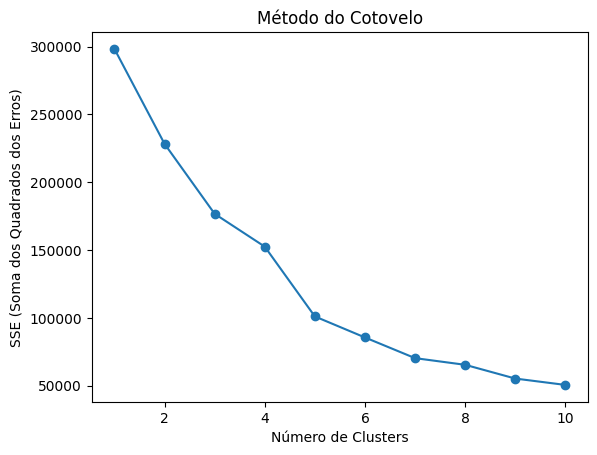

In [127]:
from sklearn.cluster import KMeans

# Método do cotovelo para encontrar o número ideal de clusters
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_scaled)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do Método do Cotovelo
plt.plot(k_values, sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE (Soma dos Quadrados dos Erros)')
plt.title('Método do Cotovelo')
plt.show()


In [133]:
# Definir o número de clusters baseado no método do cotovelo
k = 5 

# Aplicar K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data_scaled)

# Exibir os primeiros clientes com seus clusters
print(customer_data.head())


                        customer_id  num_orders  total_spent  recency  cluster
0  00012a2ce6f8dcda20d059ce98491703           1       114.74     2237        1
1  000161a058600d5901f007fab4c27140           1        67.41     2358        1
2  0001fd6190edaaf884bcaf3d49edf079           1       195.42     2496        1
3  0002414f95344307404f0ace7a26f1d5           1       179.35     2327        1
4  000379cdec625522490c315e70c7a9fb           1       107.01     2098        0


In [131]:
# Analisar as médias de cada cluster
cluster_analysis = customer_data.groupby('cluster').agg({
    'num_orders': 'mean',
    'total_spent': 'mean',
    'recency': 'mean'
}).reset_index()

print(cluster_analysis)


   cluster  num_orders  total_spent      recency
0        0    1.000000   133.840468  2078.412978
1        1    1.000000   132.126911  2338.719327
2        2    7.694118   174.157353  2239.376471
3        3    2.190353   132.923660  2210.747423
4        4    1.026748  1119.565606  2192.886591


### Com base nos resultados da segmentação de clientes, podemos observar padrões distintos entre os grupos. 

Os **Clusters 0 e 1** incluem clientes que realizaram apenas uma compra, com um total gasto semelhante, em torno de R$ 133. Embora esses clientes tenham um valor de recência considerável, o que indica que não compraram recentemente, eles representam uma oportunidade para campanhas de reativação. A ideia é incentivá-los a voltar a comprar por meio de ofertas atraentes e promoções.

O **Cluster 2** se destaca por ter clientes mais engajados, com uma média de 7,69 pedidos. Apesar do valor total gasto ser um pouco mais baixo, esses clientes têm um potencial alto para retornar, especialmente se forem incentivados com promoções direcionadas a produtos que já compraram anteriormente.

Já o **Cluster 3** apresenta uma frequência de compras ligeiramente superior, mas também um total gasto similar aos Clusters 0 e 1. Isso sugere que esses clientes podem ser motivados a aumentar a frequência de suas compras através de campanhas que destacam produtos populares.

Por outro lado, o **Cluster 4** é único, pois abrange clientes que fazem compras grandes e esporádicas, com um total gasto médio de R$ 1119,57, apesar de realizarem apenas uma compra. Para esse grupo, é interessante implementar estratégias de upsell e cross-sell, promovendo produtos de alto valor que possam complementar suas compras anteriores.

Esses insights nos permitem desenvolver estratégias de marketing personalizadas para cada grupo, visando aumentar o engajamento e as vendas. Ao focar nas características de cada cluster, podemos criar campanhas direcionadas que atendam melhor às necessidades e comportamentos dos clientes.

In [141]:
# Mesclar dados de clientes com os clusters identificados
customers_with_clusters = pd.merge(customers, customer_data[['customer_id', 'cluster']], on='customer_id')

# Analisar a distribuição dos clusters por estado
cluster_by_state = customers_with_clusters.groupby(['customer_state', 'cluster']).size().unstack().fillna(0)

# Exibir a tabela resultante
print(cluster_by_state)


cluster               0        1     2       3      4
customer_state                                       
AC                 29.0     46.0   0.0     2.0    4.0
AL                191.0    178.0   0.0    11.0   33.0
AM                 69.0     68.0   0.0     4.0    7.0
AP                 36.0     26.0   0.0     2.0    4.0
BA               1741.0   1359.0   9.0   139.0  132.0
CE                663.0    564.0   2.0    41.0   66.0
DF               1214.0    806.0   1.0    56.0   63.0
ES               1046.0    881.0   1.0    57.0   48.0
GO               1067.0    833.0   7.0    51.0   62.0
MA                359.0    342.0   0.0    17.0   29.0
MG               6144.0   4847.0  16.0   324.0  304.0
MS                407.0    264.0   1.0    14.0   29.0
MT                476.0    363.0   1.0    20.0   47.0
PA                444.0    437.0   0.0    30.0   64.0
PB                261.0    211.0   1.0    22.0   41.0
PE                861.0    664.0   2.0    56.0   69.0
PI                250.0    1

O modelo de clusterização foi aplicado, e agora temos a distribuição dos clientes por estado e cluster, o que nos permite identificar perfis distintos de consumo por região. A partir desses dados, podemos observar que os estados com maior número de clientes, como **São Paulo (SP)**, **Rio de Janeiro (RJ)**, e **Minas Gerais (MG)**, possuem uma forte concentração de clientes nos **Clusters 0** e **1**. No entanto, em estados menores, como **Roraima (RR)**, **Amapá (AP)**, e **Rondônia (RO)**, os clientes estão predominantemente nos **Clusters 0** e **1**, com pouca ou nenhuma presença nos outros clusters.

Podemos notar que estados como **SP** e **RJ** têm uma maior diversidade de perfis, com clientes distribuídos em todos os clusters, incluindo uma participação significativa no **Cluster 4**, que aparece de forma mais expressiva nesses estados. Isso pode indicar a presença de um perfil de cliente mais específico e sofisticado nessas regiões.

Os estados do Norte e Nordeste, como **Alagoas (AL)**, **Amazonas (AM)**, e **Pará (PA)**, apresentam uma distribuição mais homogênea nos **Clusters 0** e **1**, enquanto os outros clusters praticamente não têm representação. Essa homogeneidade pode sugerir que as preferências de consumo nesses estados são menos diversificadas em comparação com estados do Sul e Sudeste.

Essas observações permitem recomendar estratégias de segmentação regional, focando em campanhas direcionadas para os perfis de consumo predominantes em cada estado.